In [88]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [89]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [90]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [91]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [92]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect = True)


In [93]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['measurement', 'station']


In [94]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = Base.classes.measurement
Station = Base.classes.station

In [95]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [96]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

if most_recent_date:
    most_recent_date = most_recent_date[0]

print("Most Recent Date:", most_recent_date)


Most Recent Date: 2017-08-23


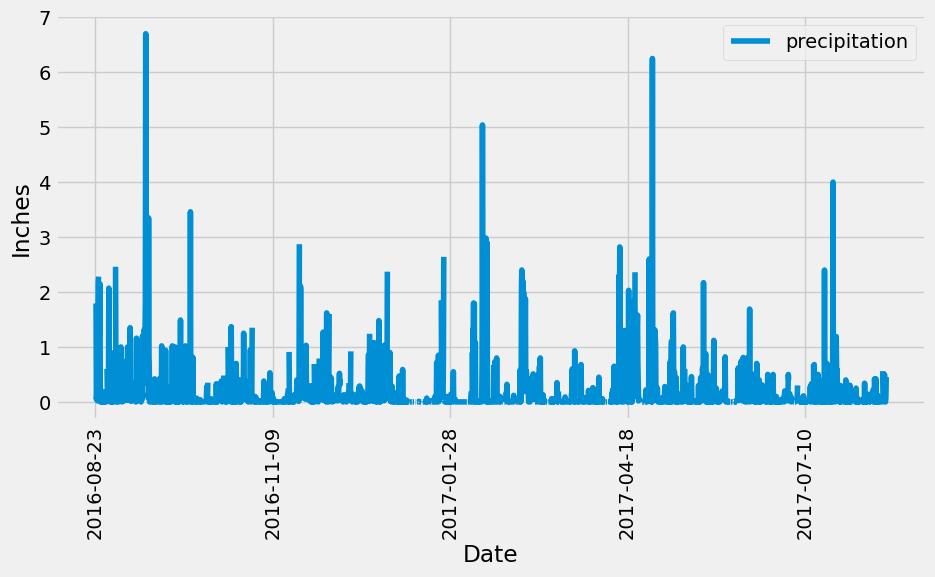

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(last_year_data, columns=['date','precipitation'])
results_df.set_index('date',  inplace=True)

# Sort the dataframe by date
sorted_df = results_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(rot=90, 
        xlabel = 'Date', 
        ylabel='Inches', 
        figsize=(10,5));



In [98]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = results_df.describe()

print(summary_stats)

       precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [99]:
# Design a query to calculate the total number of stations in the dataset
#print(results_df.columns)
total_stations = session.query(Station.station).count()
print(total_stations)

9


In [100]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [101]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(min_temp, max_temp, avg_temp)

(54.0,) (85.0,) [(71.66378066378067,)]


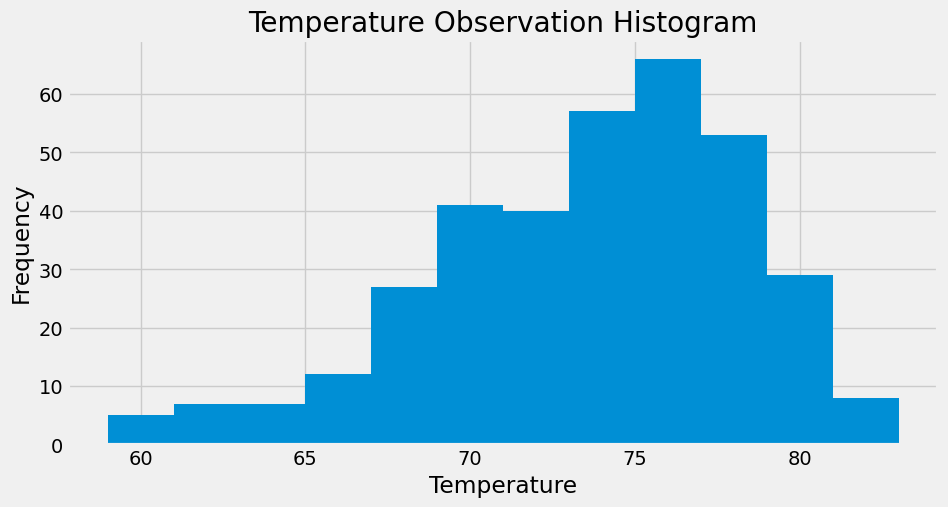

In [104]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

data_last_year = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= first_date).all()

station_df = pd.DataFrame(data_last_year, columns=['tobs'])

# Plotting histogram
plt.figure(figsize=(10, 5))
plt.hist(station_df['tobs'], bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation Histogram')

plt.show();


# Close Session

In [ ]:
# Close Session
session.close()
